
 ### Project Summary -

In the era of digital entertainment, streaming platforms such as Amazon Prime Video have become dominant players, offering audiences across the globe a wide variety of movies, TV shows, and original productions. With the massive growth in streaming content, understanding the trends, preferences, and underlying patterns in such a vast library of titles is both fascinating and valuable. This project focuses on conducting an in-depth Exploratory Data Analysis (EDA) of Amazon Prime content using two key datasets: one containing detailed title information (titles.csv) and another capturing cast and crew details (credits.csv). Together, these datasets provide a comprehensive view of what Amazon Prime offers, how content has evolved over the years, and what factors might influence ratings and popularity.

The project begins by examining content distribution, analyzing the balance between movies and TV shows, release trends across years, and the average duration of films and series. This helps us understand how Amazon Prime has positioned its content portfolio and whether there has been a shift in production strategies over time. For instance, by studying year-wise release patterns, we can identify growth phases and explore how streaming platforms have adapted to global demand, particularly during significant events like the COVID-19 pandemic.

A key focus of the analysis is on genres, as they form the backbone of audience preferences. By identifying the most common genres, their frequency, and their performance in terms of IMDb and TMDB ratings, we can highlight which types of content resonate most with viewers. Tracking genre popularity across decades also reveals how audience tastes have evolved. For example, genres like drama and comedy have historically dominated, while genres such as documentary and thriller have gained traction in recent years. This provides valuable insights into content creation trends and how Amazon Prime caters to diverse audience needs.

Another crucial dimension explored is ratings and popularity. IMDb scores, votes, and TMDB ratings are used to measure quality and audience engagement. By analyzing the distribution of ratings, the correlation between IMDb and TMDB scores, and the relationship between votes and popularity, we gain a better understanding of what drives viewer satisfaction and recognition. Highlighting the highest-rated and most-voted content gives an indication of timeless classics as well as current audience favorites.

The project also delves into age certifications, shedding light on how Amazon Prime addresses audience segments based on maturity ratings. By examining the distribution of content across certifications such as G, PG, PG-13, and R, we can determine whether the platform is more family-oriented or targeted towards mature audiences. Furthermore, comparing ratings across certifications provides insights into whether content targeted towards certain age groups tends to perform better critically.

From a global perspective, country-wise analysis helps uncover the geographical diversity of Amazon Prime’s library. By identifying leading content-producing nations, analyzing US vs. non-US contributions, and comparing average ratings by country, we gain insights into international representation. A visual representation through a world map further strengthens this global outlook.

The inclusion of the credits.csv dataset allows for cast and crew analysis, which provides a human-centric dimension to the study. Identifying the most frequent actors, directors, and writers highlights the creative contributors behind the platform’s success. Furthermore, evaluating their contribution in terms of frequency and average ratings adds depth to understanding how much influence star power and creative direction have on audience reception.

Finally, the project investigates time-based trends and engagement metrics such as IMDb votes and TMDB popularity. By looking at decade-wise content growth, runtime patterns, and the evolution of genres, we trace the historical journey of entertainment on Amazon Prime. Engagement metrics further reveal the gap between critical acclaim and audience attention, helping us understand the interplay between quality and popularity.

In summary, this project provides a holistic view of Amazon Prime’s content strategy and audience reception through comprehensive exploratory data analysis. By combining statistical KPIs with visual storytelling, we uncover patterns that not only describe the present landscape of Amazon Prime’s library but also point towards emerging trends in the global streaming industry. The insights from this study can be leveraged by content creators, streaming platforms, and even audiences to understand what makes content engaging, successful, and impactful in today’s digital entertainment era.



##### Problem Statement

With the rapid expansion of streaming platforms like Amazon Prime Video, understanding the vast library of content has become a challenge. The platform hosts thousands of movies and shows across different genres, countries, and age groups, making it essential to analyze patterns that drive popularity and audience engagement. However, the data is scattered across multiple attributes such as ratings, runtime, cast, and genres, which makes it difficult to identify clear insights. This project aims to perform exploratory data analysis to uncover meaningful trends, evaluate content distribution, and highlight factors that contribute to the success and global reach of Amazon Prime’s content.


#### Business Objective

The objective of this project is to analyze Amazon Prime’s content library to uncover insights that can support data-driven decision-making for content strategy. By examining trends in genres, ratings, release years, popularity, and cast/crew contributions, the goal is to identify what resonates most with audiences. This analysis will help in understanding viewer preferences, optimizing content acquisition or production, and enhancing customer satisfaction. Ultimately, the insights aim to support Amazon Prime in strengthening its competitive edge in the global streaming market.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [3]:
# Step 1 -  Know Your Data
title_df = pd.read_csv(r"data\titles.csv")
credit_df = pd.read_csv(r"data\credits.csv")

In [4]:
title_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [5]:
credit_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [6]:
title_df.shape

(9871, 15)

In [7]:
credit_df.shape

(124235, 5)

In [8]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [9]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [10]:
title_df.duplicated().sum()

3

In [11]:
credit_df.duplicated().sum()

56

In [12]:
title_df.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [13]:
credit_df.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64



After getting the first view and some basic investigation I have found that there are 9871 rows & 15 columns in title_df dataframe and 124235 rows & 5 columns in the credit_df dataframe. We also found for duplicated values and found 3 duplicate values in title_df dataframe & 56 duplictate values in credit_df dataframe. We also found for null values and found these number of null values respectively. description-119, age_certification-6487, seasons-8514, imdb_id-667, imdb_score-1021, imdb_votes-1031, tmdb_popularity-547, tmdb_score-2082, character-16287.


In [14]:
title_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [15]:
credit_df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [16]:
title_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [17]:
credit_df.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06



Variables Description

The project uses two datasets — titles.csv and credits.csv — containing detailed information about Amazon Prime content. The titles dataset includes variables such as title, type (Movie/Show), release_year, runtime, genres, age_certification, production_countries, imdb_score, and tmdb_popularity, which describe each piece of content’s characteristics and performance. The credits dataset provides information on the people involved in the content, including name, character, and role (Actor, Director, or Writer). Together, these variables allow for a comprehensive analysis of content distribution, quality, audience ratings, and the creative contributors behind Amazon Prime’s library.


Check Unique Values for Each 

In [18]:
title_df.nunique()

id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

In [19]:
credit_df.nunique()

person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64

##### Handling Null Values

In [20]:
# Replacing Nan values with 'Not Rated' in age_certification column

title_df['age_certification'].fillna("Not Rated",inplace=True)

# Replacing Null values with mean in imdb_score column 

title_df['imdb_score'].fillna(title_df['imdb_score'].mean(),inplace=True)
#Dropping duplicate values from both title_df and credit_df
title_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)
# Merging title_df and credit_df dataset using 'id' column as primary key 
mreged_df = title_df.merge(credit_df,on='id',how='left')
# Creating A column for decade
title_df['decade'] = (title_df['release_year'] // 10) * 10


C:\Users\codey\AppData\Local\Temp\ipykernel_16368\558222149.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  title_df['age_certification'].fillna("Not Rated",inplace=True)
C:\Users\codey\AppData\Local\Temp\ipykernel_16368\558222149.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [21]:
mreged_df.shape

(125186, 19)

In [22]:
mreged_df['runtime_category'] = ''
for i in range(mreged_df.shape[0]):
    if mreged_df.loc[i,'runtime'] < 30:
        mreged_df.loc[i,'runtime_category'] = 'Short'
    elif mreged_df.loc[i,'runtime'] <=90:
        mreged_df.loc[i,'runtime_category'] = 'Medium'
    else:
        mreged_df.loc[i,'runtime_category'] = 'Long'
    


In [23]:
# Add column is_movie 
mreged_df['is_movie']=0
for i in range(len(mreged_df)):
    if mreged_df.loc[i,'type'] == "MOVIE":
        mreged_df.loc[i,'is_movie'] = 1 
    else :
        mreged_df.loc[i,'is_movie'] = 1


In [24]:
#Categorize IMDb ratings (Poor, Average, Good, Excellent)
mreged_df['rating_category'] = ''
for i in range(mreged_df.shape[0]):
    score = mreged_df.loc[i,'imdb_score']
    if pd.isna(score):
        mreged_df.loc[i,'rating_category'] = 'Not Rated'
    elif score < 5:
        mreged_df.loc[i,'rating_category'] = 'Poor'
    elif score < 7 :
        mreged_df.loc[i,'rating_category'] = "Average"
    elif score < 8.5:
        mreged_df.loc[i,'rating_category'] = "Good"
    else :
        mreged_df.loc[i,'rating_category'] = "Excellent"

### KPIs ( Key Performance Indicators) Calculation

In [25]:
total_titles = mreged_df.shape[0]
total_movies = mreged_df[mreged_df['type'] == "MOVIE"].shape[0]
total_shows = mreged_df[mreged_df['type'] == "SHOW"].shape[0]
avg_runtime = mreged_df['runtime'].mean()
avg_imdb = mreged_df['imdb_score'].mean()
oldest_year = mreged_df['release_year'].min()
newest_year = mreged_df['release_year'].max()
print("Total Titles:", total_titles)
print("Movies:", total_movies)
print("Shows:", total_shows)
print("Average Runtime:", round(avg_runtime, 2))
print("Average IMDb Score:", round(avg_imdb, 2))
print("Release Years Range:", oldest_year, "-", newest_year)

Total Titles: 125186
Movies: 116685
Shows: 8501
Average Runtime: 95.35
Average IMDb Score: 5.97
Release Years Range: 1912 - 2022


In [29]:
#Genre Based KPIs
# Split multiple genres into separate rows
genres_split = mreged_df.dropna(subset=['genres']).copy() 
genres_split['genres'] = genres_split['genres'].str.replace('[','').str.replace(']','').str.replace("'","")
genres_split = genres_split.assign(genres = genres_split['genres'].str.split(','))
genres_split = genres_split.explode('genres')
genres_split['genres'] = genres_split['genres'].str.strip()

# Top 10 genres
top_genres = genres_split['genres'].value_counts().head(10)
print("Top 10 Genres :",top_genres)
# Average IMDb by genre
avg_imdb_genre = genres_split.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)
print("Avg IMDB_Score By Genre :",avg_imdb_genre)

Top 10 Genres : genres
drama       70006
comedy      41493
thriller    33079
action      30400
romance     28633
crime       20618
horror      14142
european    12548
scifi       11442
fantasy      8935
Name: count, dtype: int64
Avg IMDB_Score By Genre : genres
documentation    6.874880
history          6.682058
reality          6.573309
war              6.429377
animation        6.380818
european         6.336190
sport            6.256898
drama            6.228907
romance          6.121547
music            6.116504
Name: imdb_score, dtype: float64


In [31]:
#Ratings & Quality KPIs
# Average IMDb and TMDB
avg_imdb = mreged_df['imdb_score'].mean()
avg_tmdb = mreged_df['tmdb_score'].mean()
print("Average IMDb:", round(avg_imdb,2), "Average TMDB:", round(avg_tmdb,2))

# Top 10 highest rated by imdb_Score 
top_rated = mreged_df.sort_values('imdb_score',ascending=False).head(10)
print("Top 10 imdb_score :\n",top_rated[['title','imdb_score']])
# Correlation between IMDb and TMDB
correlation = mreged_df['imdb_score'].corr(mreged_df['tmdb_score'])
print("Correlatiob b/w tmdb_score and imdb_score :\n",correlation)



Average IMDb: 5.97 Average TMDB: 5.99
Top 10 imdb_score :
              title  imdb_score
119806  Pawankhind         9.9
119800  Pawankhind         9.9
119802  Pawankhind         9.9
119803  Pawankhind         9.9
119804  Pawankhind         9.9
119805  Pawankhind         9.9
119799  Pawankhind         9.9
119807  Pawankhind         9.9
119808  Pawankhind         9.9
119809  Pawankhind         9.9


Correlatiob b/w tmdb_score and imdb_score :
 0.6219097665597263


In [36]:
mreged_df['role'].nunique()

2

In [38]:
#Cast and Crew KPIs
# Top actors, directors, and writers
top_actors = mreged_df[mreged_df['role'] == "ACTOR"]['name'].value_counts().head(10)
top_directors = mreged_df[mreged_df['role'] == "DIRECTOR"]['name'].value_counts().head(10)
top_writers = mreged_df[mreged_df['role'] == "WRITER"]['name'].value_counts().head(10)
print("Top Actors:\n", top_actors)
print("Top Directors:\n", top_directors)

# Role distribution
role_dist = mreged_df['role'].value_counts()
print(role_dist)

Top Actors:
 name
George 'Gabby' Hayes    49
Roy Rogers              45
Bess Flowers            44
Gene Autry              40
Nassar                  37
Charles King            35
Herman Hack             35
Earl Dwire              34
George Morrell          34
Forrest Taylor          34
Name: count, dtype: int64
Top Directors:
 name
Joseph Kane           41
Sam Newfield          38
Jay Chapman           34
Lesley Selander       22
Harry L. Fraser       21
John English          21
William Nigh          20
Manny Rodriguez       17
Robert N. Bradbury    17
Brian Volk-Weiss      16
Name: count, dtype: int64
role
ACTOR       115793
DIRECTOR      8386
Name: count, dtype: int64


In [41]:
#Country and Regional KPIs
# Split production countries
countries_split = mreged_df.dropna(subset=['production_countries']).copy()
countries_split['production_countries'] = countries_split['production_countries'].str.replace('[','').str.replace(']','').str.replace("'",'')
countries_split = countries_split.assign(production_countries=countries_split['production_countries'].str.split(","))
countries_split = countries_split.explode('production_countries')
countries_split['production_countries'] = countries_split['production_countries'].str.strip()

# Top 10 countries
top_countries = countries_split['production_countries'].value_counts().head(10)
print(top_countries)

production_countries
US    79111
GB    12574
IN    11591
CA     6625
FR     4861
DE     3219
       2745
JP     2650
IT     2578
AU     2195
Name: count, dtype: int64


In [45]:
#Age Certification KPIs
# Count of each certification
certification_count = mreged_df['age_certification'].value_counts()
print("Number of Certification :\n\t",certification_count)

# Average IMDb by certification
avg_imdb_certification = mreged_df.groupby('age_certification')['imdb_score'].mean().sort_values().head(10)
print(avg_imdb_certification)


Number of Certification :
	 age_certification
Not Rated    68329
R            25941
PG-13        12506
PG            9641
G             3845
TV-MA         1743
TV-14         1605
TV-PG          519
TV-Y7          365
TV-Y           320
TV-G           255
NC-17          117
Name: count, dtype: int64
age_certification
NC-17        5.300653
Not Rated    5.858963
R            5.923611
G            6.039746
PG           6.102564
PG-13        6.107513
TV-Y         6.410660
TV-G         6.634831
TV-Y7        6.738242
TV-14        7.234761
Name: imdb_score, dtype: float64


In [48]:
#Popularity and Engagement KPIs
# Top 10 popular titles by tmdb_Score
top_popular_titles = mreged_df.sort_values('tmdb_popularity',ascending=False).head(10)
print("Top 10 titles by TMDB Popularity\n",top_popular_titles[['title','tmdb_popularity']])
# Correlation between popularity & IMDb
popularity_corr = mreged_df['tmdb_popularity'].corr(mreged_df['imdb_score'])
print("Correlation between TMDB Popularity and IMDb Rating:", round(popularity_corr,2))




Top 10 titles by TMDB Popularity
                      title  tmdb_popularity
116591  All the Old Knives         1437.906
116569  All the Old Knives         1437.906
116589  All the Old Knives         1437.906
116588  All the Old Knives         1437.906
116586  All the Old Knives         1437.906
116585  All the Old Knives         1437.906
116584  All the Old Knives         1437.906
116583  All the Old Knives         1437.906
116582  All the Old Knives         1437.906
116581  All the Old Knives         1437.906
Correlation between TMDB Popularity and IMDb Rating: 0.07


In [51]:
#Time and Trends KPIs
# Number of releases per year
release_trend = mreged_df['release_year'].value_counts().sort_index()
# Average IMDb per year
avg_imdb_yearly = mreged_df.groupby("release_year")['imdb_score'].mean()



#Derived KPIs (from feature engineered columns)
# Average runtime by runtime category
avg_runtime_category = mreged_df.groupby('runtime_category')['runtime'].mean()
print(avg_runtime_category)


# Average IMDb by rating category
avg_rating_category = mreged_df.groupby(['rating_category'])['imdb_score'].mean()
print(avg_rating_category)


runtime_category
Long      113.521213
Medium     74.748500
Short      21.836796
Name: runtime, dtype: float64
rating_category
Average      5.991743
Excellent    8.729434
Good         7.474342
Poor         4.087871
Name: imdb_score, dtype: float64


### Data Vizualization,Experimenting with charts : Understand the relationships between variables

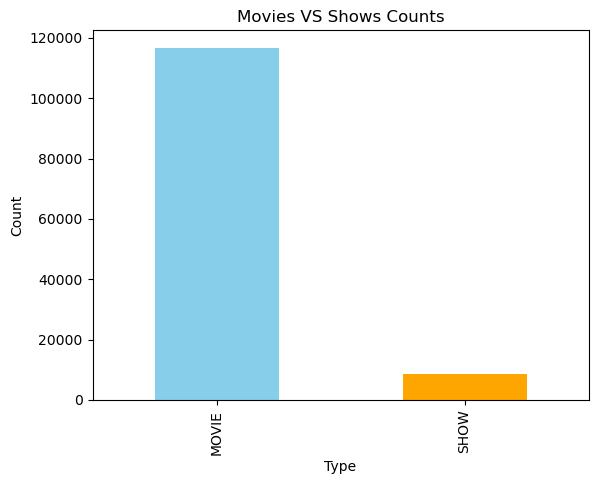

In [53]:
mreged_df['type'].value_counts().plot(kind="bar",color=['skyblue','orange'])
plt.title("Movies VS Shows Counts")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

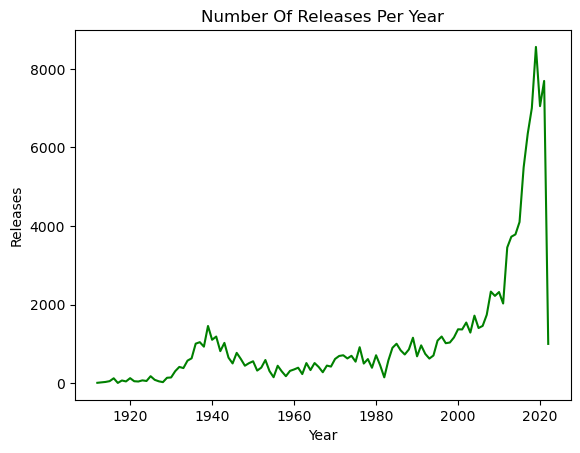

In [ ]:
# Chart - 2 Releases by Year
mreged_df['release_year'].value_counts().sort_index().plot(kind='line',color='green')
# mreged_df['release_year'].value_counts().sort_index().plot(kind='bar',color='green')
plt.title("Number Of Releases Per Year")
plt.xlabel("Year")
plt.ylabel("Releases")
plt.show()

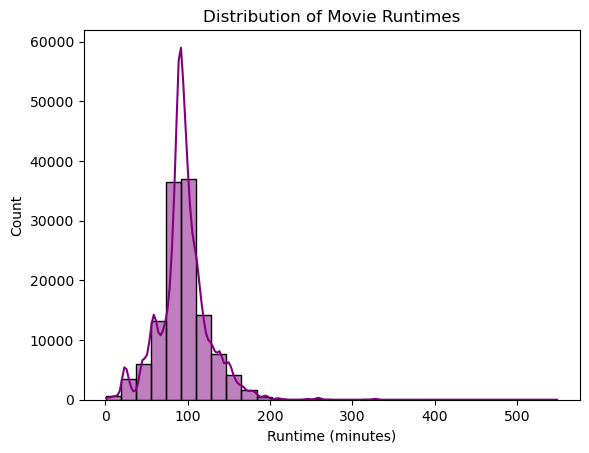

In [60]:
# Chart - 3 Runtime Distribution

sns.histplot(mreged_df['runtime'].dropna(),bins=30,color='purple',edgecolor='black',kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

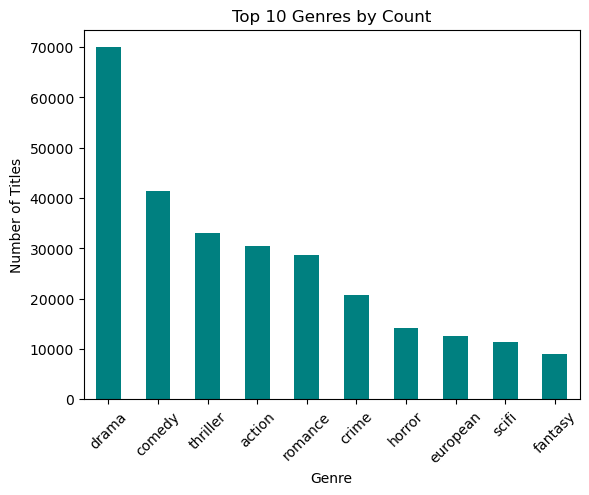

In [64]:
# Chart - 4 Top 10 Genres by Count
# Top 10 Genres by Count
genres_split['genres'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

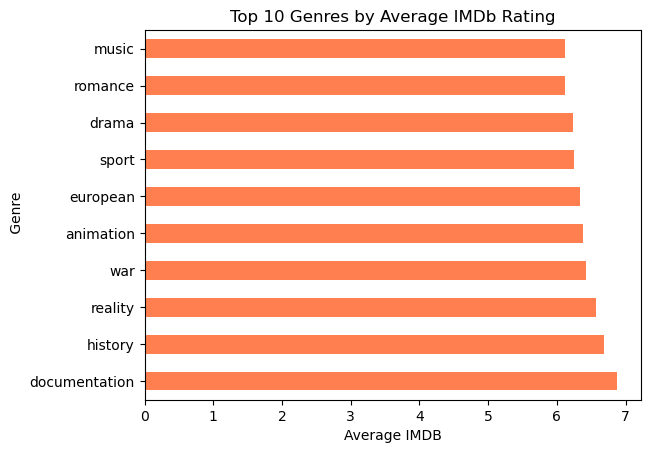

In [66]:
# Chart - 5 Average IMDb by Genre (Top 10)
avg_imdb_genre.plot(kind='barh',color='coral')
plt.title('Top 10 Genres by Average IMDb Rating')
plt.xlabel('Average IMDB')
plt.ylabel(' Genre')
# plt.xticks(rotation=45)
plt.show()

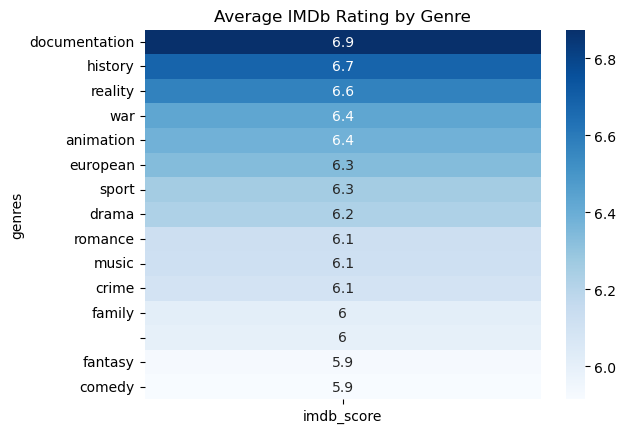

In [67]:
# Chart - 6 Genre vs IMDb Heatmap
# Genre vs IMDb Heatmap
genre_pivot = genres_split.pivot_table(index='genres',values='imdb_score',aggfunc='mean').sort_values('imdb_score',ascending=False).head(15)
sns.heatmap(genre_pivot, annot=True, cmap='Blues')
plt.title('Average IMDb Rating by Genre')
plt.show()

In [69]:
mreged_df['imdb_score'].value_counts()

imdb_score
5.976395    6367
6.300000    4368
6.200000    4284
5.700000    4223
6.400000    4125
            ... 
1.100000       9
1.300000       8
9.500000       7
1.200000       6
9.700000       1
Name: count, Length: 87, dtype: int64

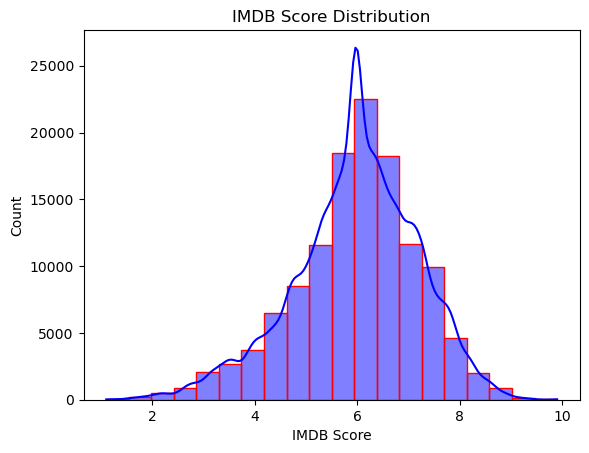

In [74]:
# Chart - 7 IMDb Score Distribution
# IMDb Score Distribution
sns.histplot(mreged_df['imdb_score'],bins=20,color='blue',kde=True,edgecolor='red')
plt.title("IMDB Score Distribution")
plt.xlabel("IMDB Score")
plt.ylabel("Count")
plt.show()

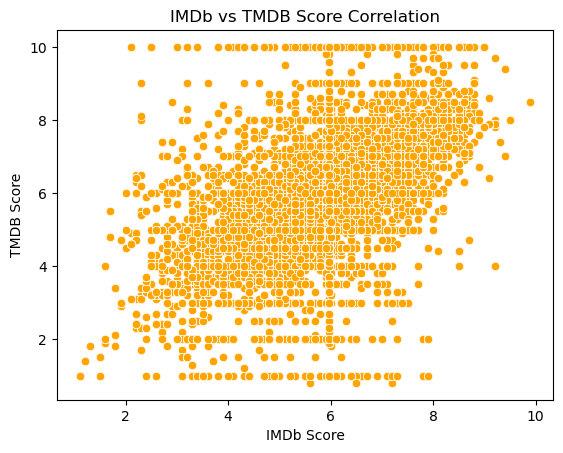

In [76]:
# IMDb vs TMDB Correlation Scatterplot
sns.scatterplot(data=mreged_df, x='imdb_score', y='tmdb_score', color='orange')
plt.title('IMDb vs TMDB Score Correlation')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.show()
     


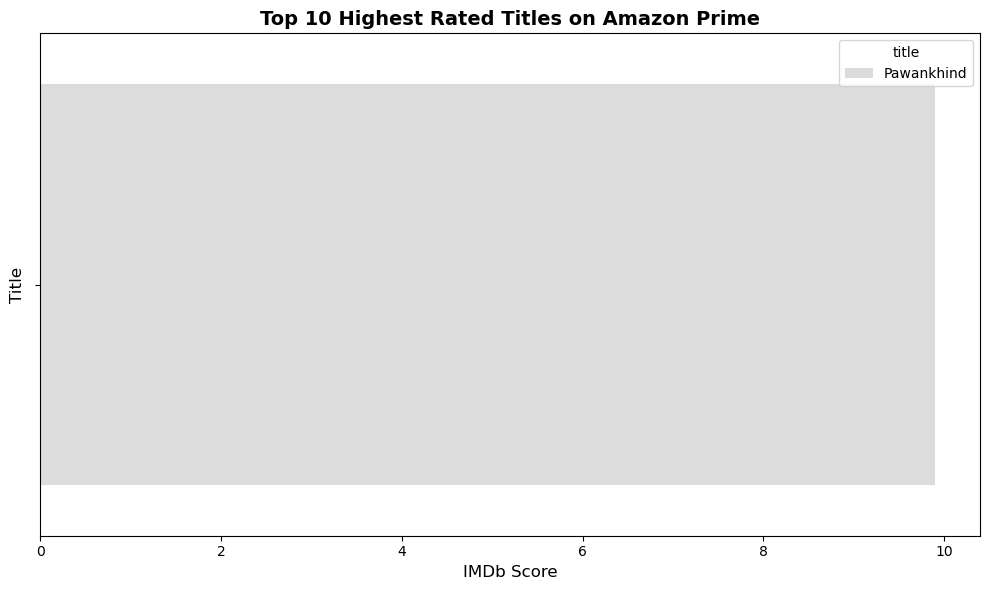

In [77]:
# Chart - 9 Sort dataset by IMDb score (descending)


# Sort dataset by IMDb score (descending)
top_rated = mreged_df.sort_values('imdb_score', ascending=False).head(10)

# Create barplot for Top 10 Highest Rated Titles
plt.figure(figsize=(10,6))
sns.barplot(data=top_rated, x='imdb_score', hue='title', palette='coolwarm')

# Chart labels and title
plt.title('Top 10 Highest Rated Titles on Amazon Prime', fontsize=14, weight='bold')
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Title', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

     


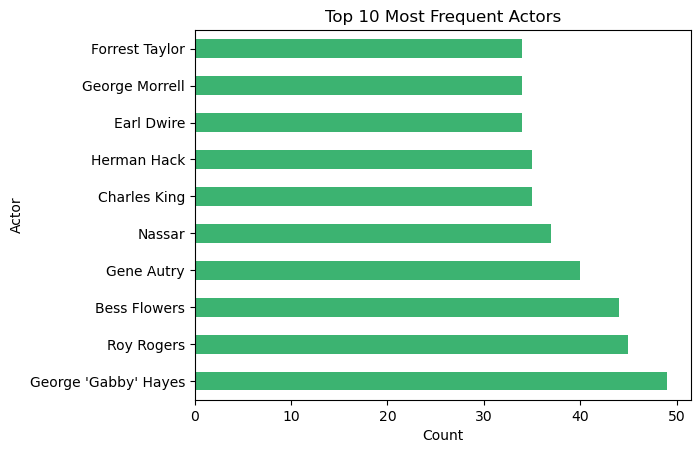

In [78]:
# Top 10 Actors

top_actors.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()


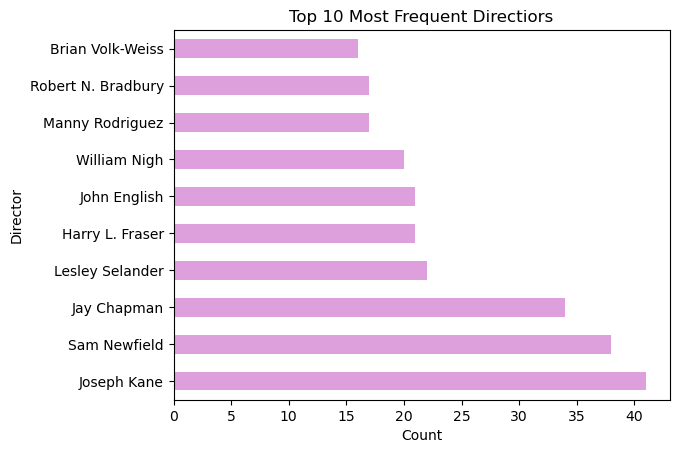

In [79]:
# Chart - 11 Top 10 Directors
top_directors.plot(kind='barh',color='plum')
plt.title("Top 10 Most Frequent Directiors")
plt.ylabel("Director")
plt.xlabel("Count")
plt.show()

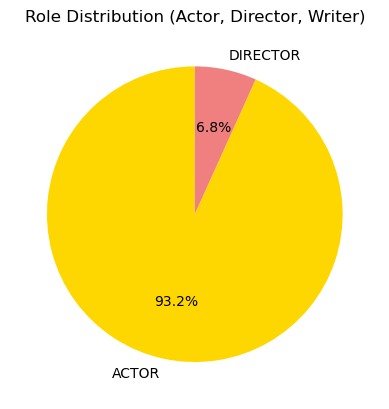

In [88]:
#Chart - 12 Role Distribution
# Role Distribution

role_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'],)
plt.title('Role Distribution (Actor, Director, Writer)')
plt.ylabel('')
plt.show()

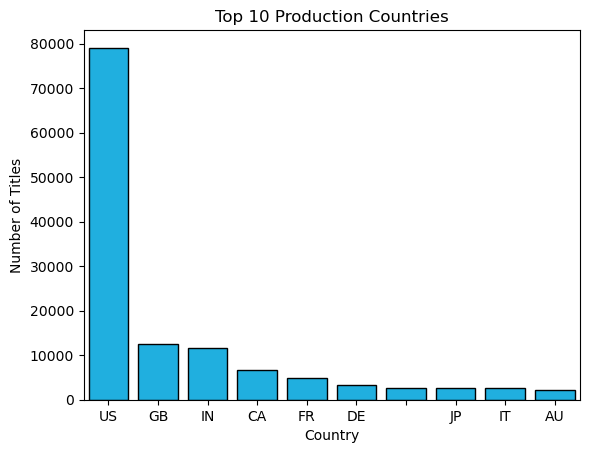

In [86]:
# Chart - 13 Top 10 Production Countries
# Top 10 Production Countries
sns.barplot(top_countries,color='deepskyblue',edgecolor='black')
plt.title('Top 10 Production Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
# plt.xticks(rotation=45)
plt.show()

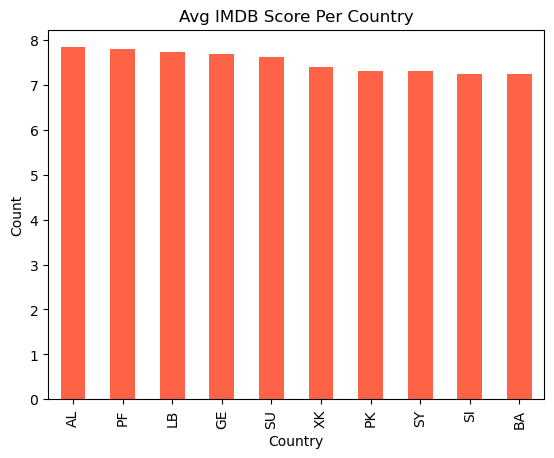

In [92]:
# Chart - 14 - Average IMDb by Country
# Average IMDb by Country
avg_imdb_score_country = countries_split.groupby('production_countries')['imdb_score'].mean().sort_values(ascending=False).head(10)
avg_imdb_score_country.plot(kind='bar',color='tomato')
plt.title("Avg IMDB Score Per Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

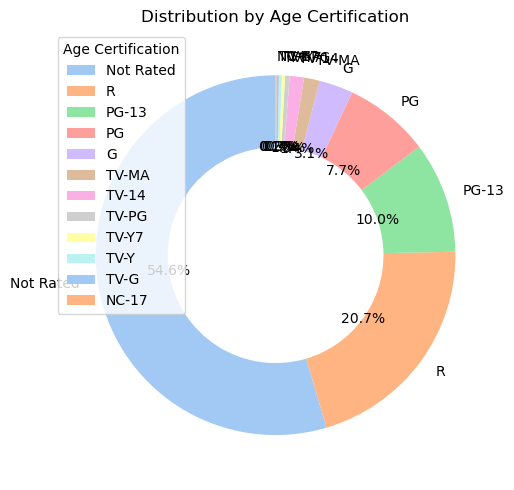

In [104]:
#Chart - 15 - Certification Distribution
# Certification Distribution
plt.figure(figsize=(8,5))
mreged_df['age_certification'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=sns.color_palette("pastel"),wedgeprops=dict(width=0.4))
plt.legend(title='Age Certification', loc='upper left')
plt.title('Distribution by Age Certification')
plt.ylabel('')
plt.tight_layout()
plt.show()

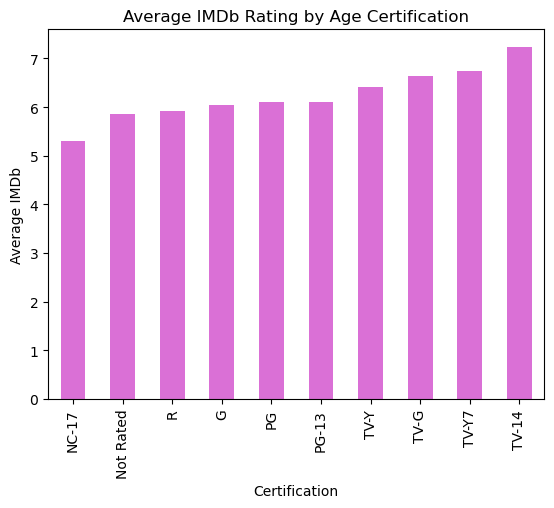

In [105]:
#Chart - 16 - Average IMDb by Certification
# Average IMDb by Certification

avg_imdb_certification.plot(kind='bar', color='orchid')
plt.title('Average IMDb Rating by Age Certification')
plt.xlabel('Certification')
plt.ylabel('Average IMDb')
plt.show()


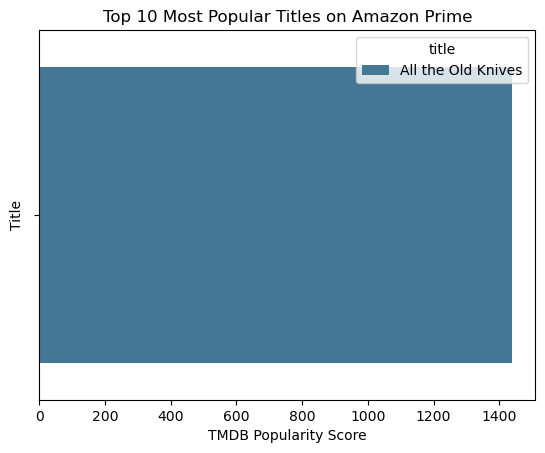

In [106]:
# Chart 17 Top 10 Popular Titles
sns.barplot(data=top_popular_titles, x='tmdb_popularity', hue='title', palette='mako')
plt.title('Top 10 Most Popular Titles on Amazon Prime')
plt.xlabel('TMDB Popularity Score')
plt.ylabel('Title')
plt.show()

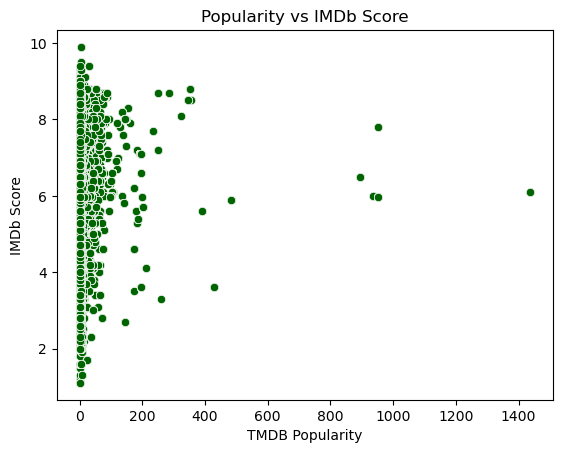

In [107]:


# Popularity vs IMDb Scatterplot

sns.scatterplot(data=mreged_df, x='tmdb_popularity', y='imdb_score', color='darkgreen')
plt.title('Popularity vs IMDb Score')
plt.xlabel('TMDB Popularity')
plt.ylabel('IMDb Score')
plt.show()
     


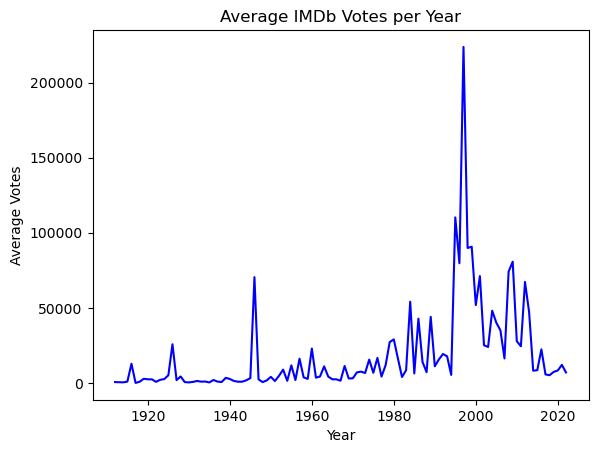

In [108]:
# IMDb Votes Trend (if available)

if 'imdb_votes' in mreged_df.columns:
    mreged_df.groupby('release_year')['imdb_votes'].mean().plot(kind='line', color='blue')
    plt.title('Average IMDb Votes per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Votes')
    plt.show()

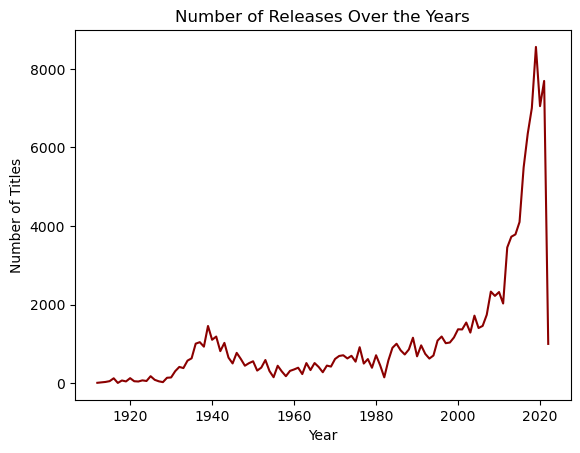

In [109]:
# Total Releases per Year

mreged_df['release_year'].value_counts().sort_index().plot(kind='line', color='darkred')
plt.title('Number of Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

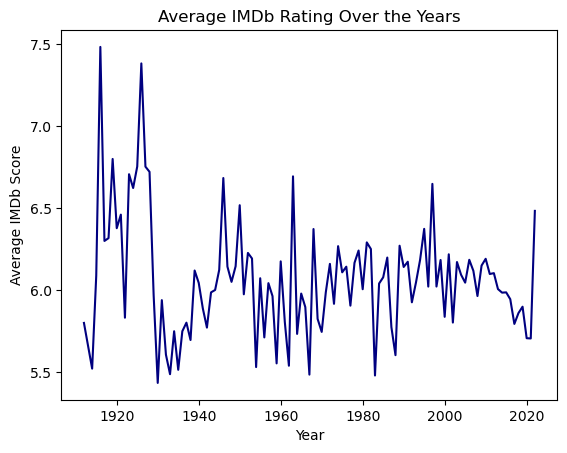

In [110]:
# Average IMDb per Year

avg_imdb_yearly.plot(kind='line', color='navy')
plt.title('Average IMDb Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.show()

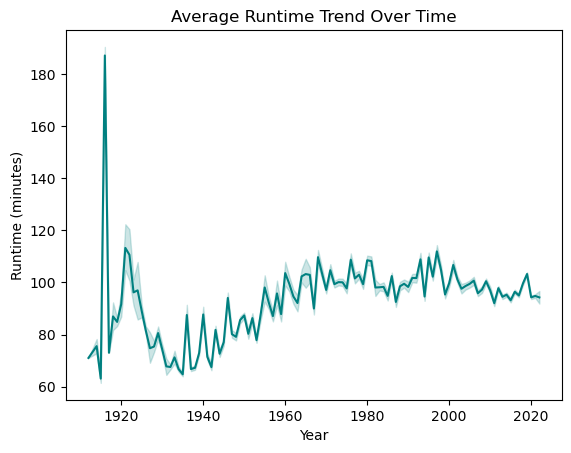

In [111]:
# Runtime Trend Over Years

sns.lineplot(data=mreged_df, x='release_year', y='runtime', color='teal')
plt.title('Average Runtime Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.show()

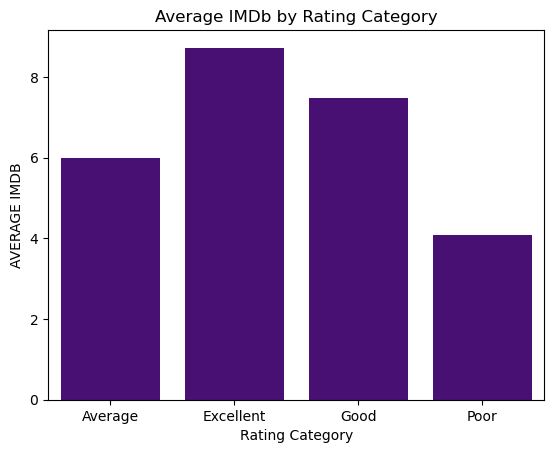

In [120]:
sns.barplot(avg_rating_category,color='indigo')
plt.title("Average IMDb by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("AVERAGE IMDB")
plt.show()

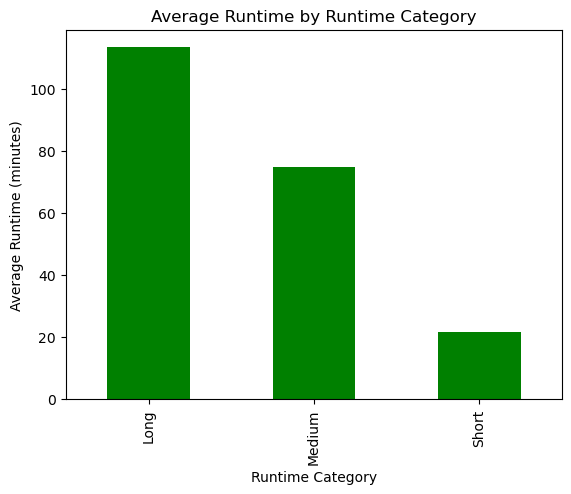

In [122]:
# Average Runtime by Runtime Category

avg_runtime_category.plot(kind='bar', color='green')
plt.title('Average Runtime by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Runtime (minutes)')
plt.show()

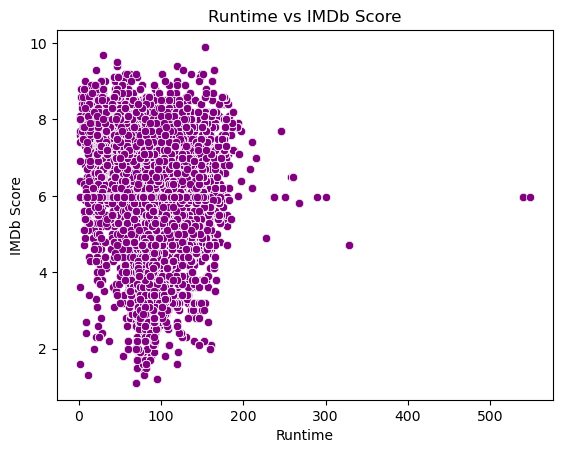

In [123]:
# Runtime vs IMDb Scatter

sns.scatterplot(data=mreged_df, x='runtime', y='imdb_score', color='purple')
plt.title('Runtime vs IMDb Score')
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.show()